# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Dependencies and Setup

import json
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st


# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500) ##cambiar a 1500!!!!
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)#cambiar a 1500!!!!!!!
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
# print(f"Number of cities in the list: {len(cities)}")
cities

['tuatapere',
 'norman wells',
 'port blair',
 'vaini',
 'ulaanbaatar',
 'tasiilaq',
 'magadan',
 'susehri',
 'labuhan',
 'sabang',
 'znamenskoye',
 'mahebourg',
 'saint-joseph',
 'pokhvistnevo',
 'chuy',
 'avarua',
 'arraial do cabo',
 'hasaki',
 'saskylakh',
 'vestmanna',
 'ushuaia',
 'bluff',
 'jamestown',
 'vila velha',
 'iqaluit',
 'belmonte',
 'narsaq',
 'busselton',
 'qaanaaq',
 'puerto colombia',
 'sandakan',
 'attawapiskat',
 'nizhniy tsasuchey',
 'rayevskiy',
 'rodez',
 'hilo',
 'salalah',
 'sibay',
 'illoqqortoormiut',
 'bang saphan',
 'hurghada',
 'atuona',
 'taolanaro',
 'west fargo',
 'butaritari',
 'tuktoyaktuk',
 'charters towers',
 'yukamenskoye',
 'camacha',
 'houma',
 'kapaa',
 'tiarei',
 'saint-philippe',
 'haines junction',
 'amderma',
 'simao',
 'olga',
 'bukachacha',
 'acapulco',
 'aklavik',
 'thompson',
 'ippy',
 'russell',
 'kodiak',
 'condoto',
 'punta arenas',
 'mys shmidta',
 'hermanus',
 'faanui',
 'pangnirtung',
 'uyo',
 'rikitea',
 'ribeira grande',
 'iga

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?q="

units="metric"
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}{city}&appid={weather_api_key}&units={units}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = response['coord']['lat']
        city_lng = response['coord']['lon']
        city_max_temp = response['main']['temp_max']
        city_humidity = response['main']['humidity']
        city_clouds = response['clouds']['all']
        city_wind = response['wind']['speed'] #AQUI TENGO DUDA DE QUE TENGO QUE PONER
        city_country = response['sys']['country']
        city_date = response['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tuatapere
Processing Record 2 of Set 1 | norman wells
Processing Record 3 of Set 1 | port blair
Processing Record 4 of Set 1 | vaini
Processing Record 5 of Set 1 | ulaanbaatar
Processing Record 6 of Set 1 | tasiilaq
Processing Record 7 of Set 1 | magadan
Processing Record 8 of Set 1 | susehri
Processing Record 9 of Set 1 | labuhan
Processing Record 10 of Set 1 | sabang
Processing Record 11 of Set 1 | znamenskoye
Processing Record 12 of Set 1 | mahebourg
Processing Record 13 of Set 1 | saint-joseph
Processing Record 14 of Set 1 | pokhvistnevo
Processing Record 15 of Set 1 | chuy
Processing Record 16 of Set 1 | avarua
Processing Record 17 of Set 1 | arraial do cabo
Processing Record 18 of Set 1 | hasaki
Processing Record 19 of Set 1 | saskylakh
Processing Record 20 of Set 1 | vestmanna
Processing Record 21 of Set 1 | ushuaia
Processing Record 22 of Set 1 | bluff
Processing Record 23 of Set 1 | jame

Processing Record 38 of Set 4 | valparaiso
Processing Record 39 of Set 4 | orgun
City not found. Skipping...
Processing Record 40 of Set 4 | merauke
Processing Record 41 of Set 4 | kavieng
Processing Record 42 of Set 4 | belushya guba
City not found. Skipping...
Processing Record 43 of Set 4 | zaraza
Processing Record 44 of Set 4 | lompoc
Processing Record 45 of Set 4 | aloleng
Processing Record 46 of Set 4 | guerrero negro
Processing Record 47 of Set 4 | nizhneyansk
City not found. Skipping...
Processing Record 48 of Set 4 | nanortalik
Processing Record 49 of Set 4 | lucapa
Processing Record 0 of Set 5 | tura
Processing Record 1 of Set 5 | barrow
Processing Record 2 of Set 5 | hithadhoo
Processing Record 3 of Set 5 | leningradskiy
Processing Record 4 of Set 5 | caiaponia
Processing Record 5 of Set 5 | santa rosa
Processing Record 6 of Set 5 | talnakh
Processing Record 7 of Set 5 | airai
Processing Record 8 of Set 5 | nouadhibou
Processing Record 9 of Set 5 | deseronto
Processing Recor

Processing Record 26 of Set 8 | yulara
Processing Record 27 of Set 8 | lagoa
Processing Record 28 of Set 8 | puro
Processing Record 29 of Set 8 | kidal
Processing Record 30 of Set 8 | kungurtug
Processing Record 31 of Set 8 | bambous virieux
Processing Record 32 of Set 8 | carutapera
Processing Record 33 of Set 8 | la asuncion
Processing Record 34 of Set 8 | arrifes
Processing Record 35 of Set 8 | severodvinsk
Processing Record 36 of Set 8 | kapit
Processing Record 37 of Set 8 | lyuban
Processing Record 38 of Set 8 | comodoro rivadavia
Processing Record 39 of Set 8 | ust-nera
Processing Record 40 of Set 8 | arman
Processing Record 41 of Set 8 | susanville
Processing Record 42 of Set 8 | peniche
Processing Record 43 of Set 8 | christchurch
Processing Record 44 of Set 8 | chifeng
Processing Record 45 of Set 8 | el tular
Processing Record 46 of Set 8 | ca mau
Processing Record 47 of Set 8 | karasburg
Processing Record 48 of Set 8 | aksarka
Processing Record 49 of Set 8 | lebanon
Processin

Processing Record 16 of Set 12 | maun
Processing Record 17 of Set 12 | auki
Processing Record 18 of Set 12 | kingaroy
Processing Record 19 of Set 12 | abu dhabi
Processing Record 20 of Set 12 | monroe
Processing Record 21 of Set 12 | fort nelson
Processing Record 22 of Set 12 | seymchan
Processing Record 23 of Set 12 | maniitsoq
Processing Record 24 of Set 12 | odesskoye
Processing Record 25 of Set 12 | lavrentiya
Processing Record 26 of Set 12 | torres
Processing Record 27 of Set 12 | easley
Processing Record 28 of Set 12 | alta floresta
Processing Record 29 of Set 12 | luganville
Processing Record 30 of Set 12 | ustka
Processing Record 31 of Set 12 | mocambique
City not found. Skipping...
Processing Record 32 of Set 12 | aksum
Processing Record 33 of Set 12 | hualmay
Processing Record 34 of Set 12 | lalmohan
Processing Record 35 of Set 12 | urucara
Processing Record 36 of Set 12 | apatzingan
Processing Record 37 of Set 12 | la ronge
Processing Record 38 of Set 12 | tabas
Processing R

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df=pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          14
Lat           14
Lng           14
Max Temp      14
Humidity      14
Cloudiness    14
Wind Speed    14
Country       14
Date          14
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,hilo,19.7297,-155.0900,24.41,85,57,1.34,US,1676080812
1,kazanskaya,45.4106,40.4361,-5.10,92,100,0.54,RU,1676080832
2,skelleftea,64.7507,20.9528,-6.80,100,6,2.57,SE,1676080424
3,cherskiy,68.7500,161.3000,-38.14,95,92,2.22,RU,1676080836
4,stornoway,58.2093,-6.3865,9.98,94,100,8.23,GB,1676080837


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv")

In [11]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv")

# Display sample data
city_data_df.head()

,Unnamed: 0,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,0,hilo,19.7297,-155.0900,24.41,85,57,1.34,US,1676080812
1,1,kazanskaya,45.4106,40.4361,-5.10,92,100,0.54,RU,1676080832
2,2,skelleftea,64.7507,20.9528,-6.80,100,6,2.57,SE,1676080424
3,3,cherskiy,68.7500,161.3000,-38.14,95,92,2.22,RU,1676080836
4,4,stornoway,58.2093,-6.3865,9.98,94,100,8.23,GB,1676080837


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

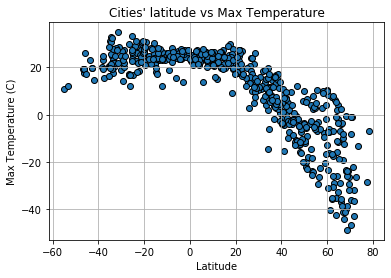

In [9]:
# Build scatter plot for latitude vs. temperature
x_lat=city_data_df.iloc[:,1]
y_temp=city_data_df.iloc[:,3]
plt.scatter(x_lat,y_temp,edgecolors='black')

# Incorporate the other graph properties
plt.title("Cities' latitude vs Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True,)
# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()


#### Latitude Vs. Humidity

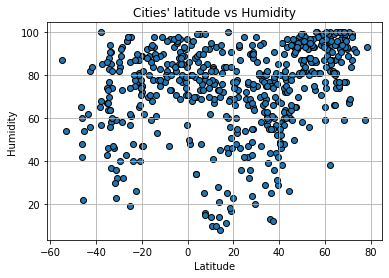

In [10]:
# Build the scatter plots for latitude vs. humidity
y_humidity=city_data_df.iloc[:,4]
plt.scatter(x_lat,y_humidity,edgecolors='black')

# Incorporate the other graph properties
plt.title("Cities' latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid(True,)


# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

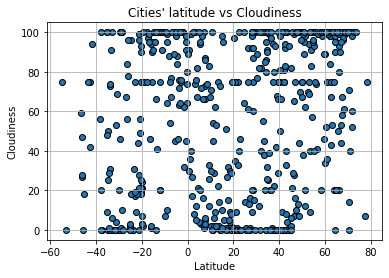

In [11]:
# Build scatter plot for latitude vs. temperature
y_cloud=city_data_df.iloc[:,5]
plt.scatter(x_lat,y_cloud,edgecolors='black')

# Incorporate the other graph properties
plt.title("Cities' latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.grid(True,)
# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

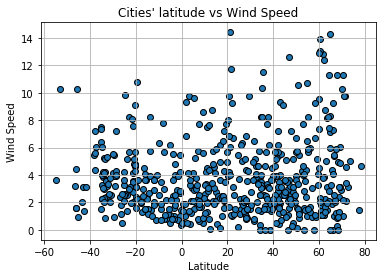

In [12]:
# Build scatter plot for latitude vs. temperature
y_wind=city_data_df.iloc[:,6]
plt.scatter(x_lat,y_wind,edgecolors='black')

# Incorporate the other graph properties
plt.title("Cities' latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.grid(True,)
# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [18]:
# Define a function to create Linear Regression plots
def LinRegress(x,y):
    correlation=st.pearsonr(x,y)
    (slope, intercept, rvalue, pvalue, stderr)=linregress(x,y)
    regress_values = x * slope + intercept
    line_eq="y=" + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x,y)
    plt.plot(x,regress_values,"r-")
    plt.annotate(line_eq,(min(x),min(y)),fontsize=15,color="red")
    plt.xlabel('Lat')
    plt.ylabel('temp')
    print(f"The correlation between both factors is \
    {round(correlation[0],2)}")
    plt.show()
    print(correlation)
    print(f"the r-squared is: {rvalue**2}")

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df=city_data_df[city_data_df["Lat"] >= 0].reset_index(drop=True)
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kapaa,22.0752,-159.3190,27.18,70,75,9.26,US,1676073974
1,thompson,55.7435,-97.8558,-6.91,73,100,1.54,CA,1676073975
2,guerrero negro,27.9769,-114.0611,21.25,24,100,4.33,MX,1676073978
3,tasiilaq,65.6145,-37.6368,-6.91,96,100,1.87,GL,1676073979
4,raudeberg,61.9875,5.1352,7.37,38,100,12.86,NO,1676073979


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df=city_data_df[city_data_df["Lat"]<0].reset_index(drop=True)
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port alfred,-33.5906,26.8910,21.77,91,91,0.89,ZA,1676073973
1,busselton,-33.6500,115.3333,17.70,58,0,4.18,AU,1676073703
2,new norfolk,-42.7826,147.0587,19.72,56,42,1.39,AU,1676073982
3,gladstone,-23.8500,151.2500,28.96,48,0,2.57,AU,1676073987
4,hermanus,-34.4187,19.2345,21.00,77,0,4.23,ZA,1676073988


###  Temperature vs. Latitude Linear Regression Plot

The correlation between both factors is     -0.85


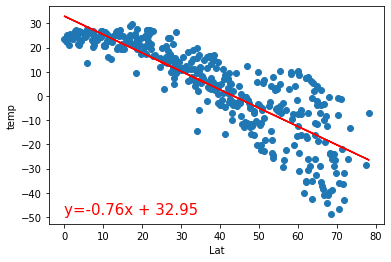

(-0.8509048717451521, 1.1009653623192628e-109)
the r-squared is: 0.7240391007596336


In [19]:
# Linear regression on Northern Hemisphere
lat_north = northern_hemi_df["Lat"]
temp_north = northern_hemi_df["Max Temp"]
LinRegress(lat_north,temp_north)


The correlation between both factors is     0.3


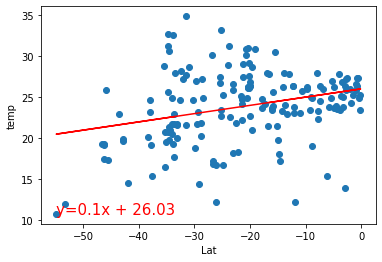

(0.29523247205724334, 8.434484603063585e-05)
the r-squared is: 0.08716221255703104


In [20]:
lat_south = southern_hemi_df["Lat"]
temp_south = southern_hemi_df["Max Temp"]
LinRegress(lat_south,temp_south)


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The correlation between both factors is     0.38


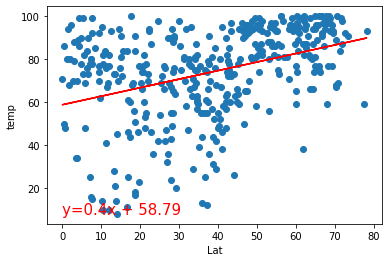

(0.380314932320335, 9.143388825611013e-15)
the r-squared is: 0.14463944774582096


In [21]:
# Northern Hemisphere
humidity_north = northern_hemi_df["Humidity"]
LinRegress(lat_north,humidity_north)

The correlation between both factors is     0.39


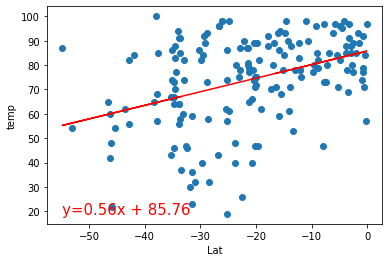

(0.3932670082070737, 9.467818408466633e-08)
the r-squared is: 0.15465893974414263


In [22]:
# Southern Hemisphere
humidity_south = southern_hemi_df["Humidity"]
LinRegress(lat_south,humidity_south)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The correlation between both factors is     0.37


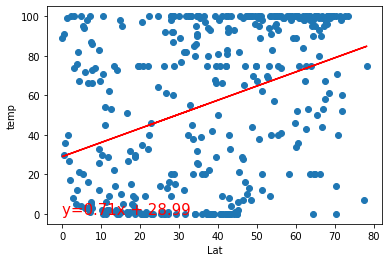

(0.36797265626389264, 7.460642674130562e-14)
the r-squared is: 0.13540387575790505


In [23]:
# Northern Hemisphere

cloud_north = northern_hemi_df["Cloudiness"]
LinRegress(lat_north,cloud_north)

The correlation between both factors is     0.43


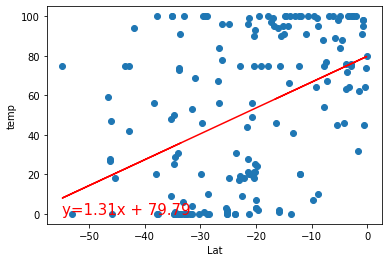

(0.43395176338621844, 2.73107581908741e-09)
the r-squared is: 0.1883141329460086


In [24]:
# Southern Hemisphere
cloud_south = southern_hemi_df["Cloudiness"]
LinRegress(lat_south,cloud_south)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The correlation between both factors is     0.12


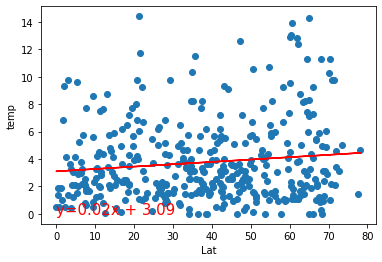

(0.12004229412292351, 0.018156083164389266)
the r-squared is: 0.014410152378294473


In [25]:
# Northern Hemisphere
wind_north = northern_hemi_df["Wind Speed"]
LinRegress(lat_north,wind_north)

The correlation between both factors is     -0.27


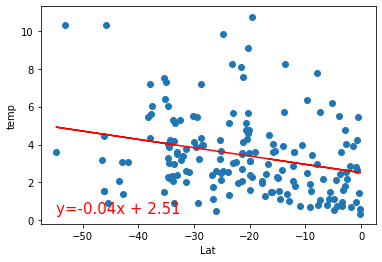

(-0.2668251410095113, 0.00040281884851517733)
the r-squared is: 0.07119565587474563


In [27]:
# Southern Hemisphere

wind_south = southern_hemi_df["Wind Speed"]
LinRegress(lat_south,wind_south)

**Discussion about the linear relationship:** YOUR RESPONSE HERE